In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
# =================================================-
#### Slide 3/32: Loading packages  ####

import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
# =================================================-
#### Slide 4/32: Directory settings  ####

# Pathlib is no longer needed after flattening the directory structure
data_dir = Path.cwd() / "data"
plot_dir = Path.cwd() / "plots"
data_dir.mkdir(exist_ok=True)
plot_dir.mkdir(exist_ok=True)

In [4]:
# =================================================-
#### Slide 5/32: Importing matplotlib  ####

import matplotlib.pyplot as plt

In [5]:
# =================================================-
#### Slide 6/32: Dataset for visualization  ####

# This dataset is of type dataframe. Let's assign this dataset to a variable, so that we can manipulate it freely.
df = pd.read_csv("data/diabetes.csv")
print(type(df))  # <- a Pandas DataFrame!
print(len(df))  # <- returns the number of rows

<class 'pandas.core.frame.DataFrame'>
768


In [6]:
# =================================================-
#### Slide 7/32: Subsetting data  ####

df_subset = df.set_index("id")
df_subset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
id,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# =================================================-
#### Slide 11/32: Prepare data: group and summarize (cont'd)  ####

grouping_col = df_subset.nunique().idxmin()
df_grouped_mean = df_subset.drop("Pregnancies", axis=1).groupby(grouping_col).mean()
df_grouped_mean

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# =================================================-
#### Slide 12/32: Prepare data: group and summarize (cont'd)  ####

# Reset index of the dataset.
df_grouped_mean = df_grouped_mean.reset_index()
df_grouped_mean

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
df_grouped_mean

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
# =================================================-
#### Slide 15/32: Wide to long format: melt (cont'd)  ####

# Melt the wide data into long.
df_grouped_mean_long = pd.melt(
    df_grouped_mean,  # <- wide dataset
    id_vars=grouping_col,  # <- identifying variable
    var_name="metric",  # <- contains col names of wide data
    value_name="mean",
)  # <- contains values from above columns
df_grouped_mean_long

,Outcome,metric,mean
0,0,Glucose,109.980000
1,1,Glucose,141.257463
2,0,BloodPressure,68.184000
3,1,BloodPressure,70.824627
4,0,SkinThickness,19.664000
5,1,SkinThickness,22.164179
6,0,Insulin,68.792000
7,1,Insulin,100.335821
8,0,BMI,30.304200
9,1,BMI,35.142537


In [11]:
# =================================================-
#### Slide 17/32: Long to wide format: pivot (cont'd)  ####

# Melt the long data into wide.
df_grouped_mean_wide = df_grouped_mean_long.pivot(
    index=grouping_col,  # <- identifying variable
    columns="metric",  # <- col names of wide data
    values="mean",
)  # <- values from above columns
df_grouped_mean_wide

metric,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,SkinThickness
Outcome,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,19.664000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,22.164179


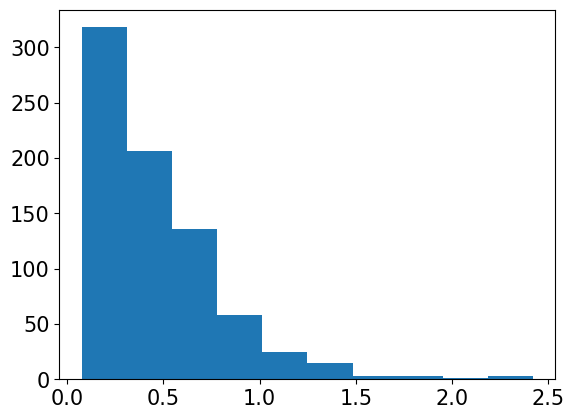

In [12]:
# =================================================-
#### Slide 20/32: Univariate plots: histogram  ####

plt.rcParams.update({"font.size": 15})
plt.hist(df["DiabetesPedigreeFunction"]);

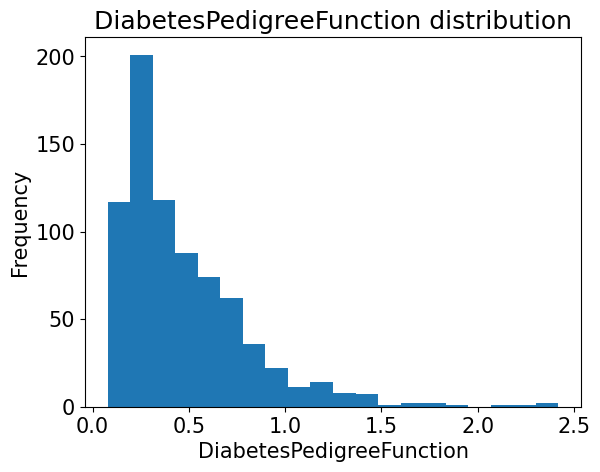

In [13]:
# =================================================-
#### Slide 21/32: Univariate plots: histogram (cont'd)  ####

df["DiabetesPedigreeFunction"].plot.hist(
    bins=20,
    title="DiabetesPedigreeFunction distribution",
    xlabel="DiabetesPedigreeFunction",
    ylabel="Frequency",
);

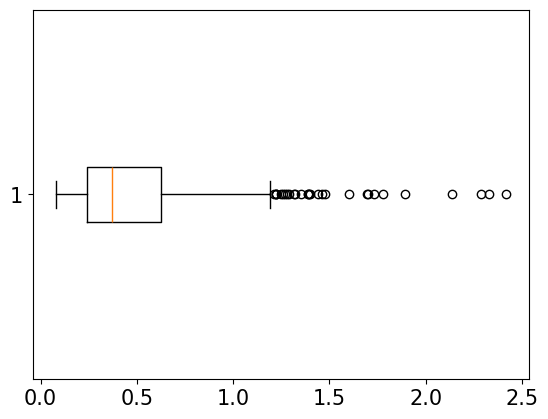

In [14]:
# =================================================-
#### Slide 22/32: Univariate plots: boxplot  ####

plt.boxplot(df["DiabetesPedigreeFunction"], vert=False);

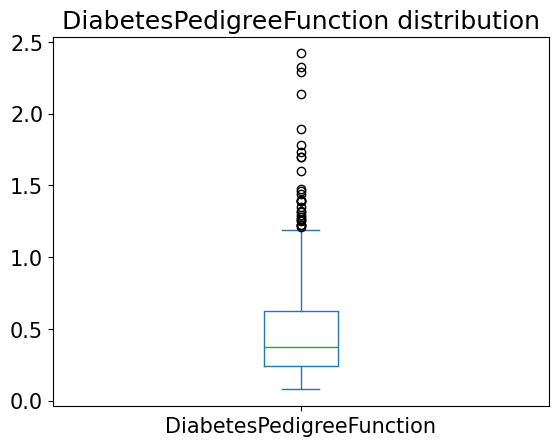

In [15]:
# =================================================-
#### Slide 23/32: Univariate plots: boxplot (cont'd)  ####

df["DiabetesPedigreeFunction"].plot.box(
    title="DiabetesPedigreeFunction distribution",
);

In [16]:
# =================================================-
#### Slide 25/32: Univariate plots: bar chart - cont'd  ####

df_grouped_mean_long.head()

,Outcome,metric,mean
0,0,Glucose,109.980000
1,1,Glucose,141.257463
2,0,BloodPressure,68.184000
3,1,BloodPressure,70.824627
4,0,SkinThickness,19.664000


In [17]:
# =================================================-
#### Slide 26/32: Univariate plots: bar chart - cont'd  ####

df_true_means = df_grouped_mean_long.query("Outcome==0")[["metric", "mean"]]
df_true_means

,metric,mean
0,Glucose,109.980000
2,BloodPressure,68.184000
4,SkinThickness,19.664000
6,Insulin,68.792000
8,BMI,30.304200
10,DiabetesPedigreeFunction,0.429734
12,Age,31.190000


In [18]:
mask = df_grouped_mean_long["Outcome"] == 0
df_true_means = df_grouped_mean_long[mask].drop("Outcome", axis=1)
df_true_means

,metric,mean
0,Glucose,109.980000
2,BloodPressure,68.184000
4,SkinThickness,19.664000
6,Insulin,68.792000
8,BMI,30.304200
10,DiabetesPedigreeFunction,0.429734
12,Age,31.190000


In [19]:
# =================================================-
#### Slide 27/32: Univariate plots: bar chart - cont'd  ####

bar_labels = df_true_means["metric"]  # <- 1
bar_heights = df_true_means["mean"]  # <- 2
num_bars = len(bar_heights)
bar_positions = np.arange(num_bars)  # <- 3

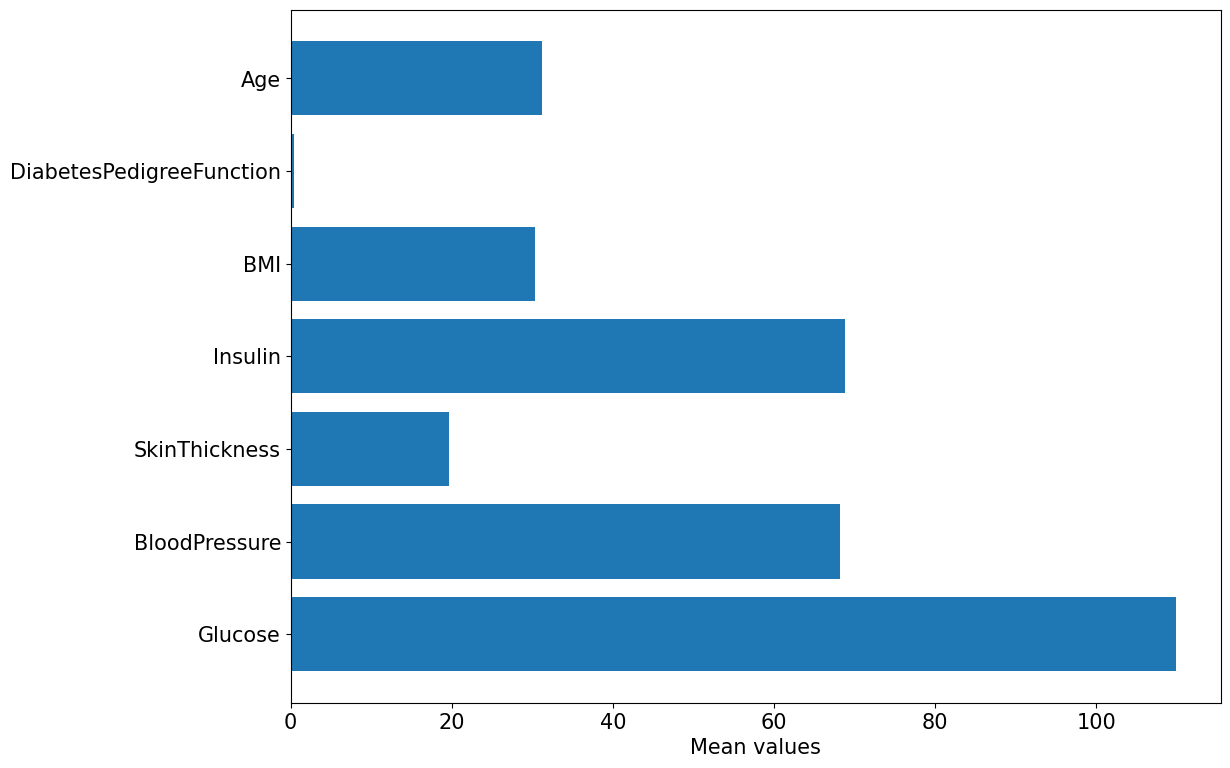

In [20]:
# =================================================-
#### Slide 28/32: Univariate plots: bar chart - cont'd  ####

plt.figure(figsize=(12, 9))
plt.barh(bar_positions, bar_heights)
plt.yticks(bar_positions, bar_labels)
plt.xlabel("Mean values");


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [21]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv").drop("id", axis=1)

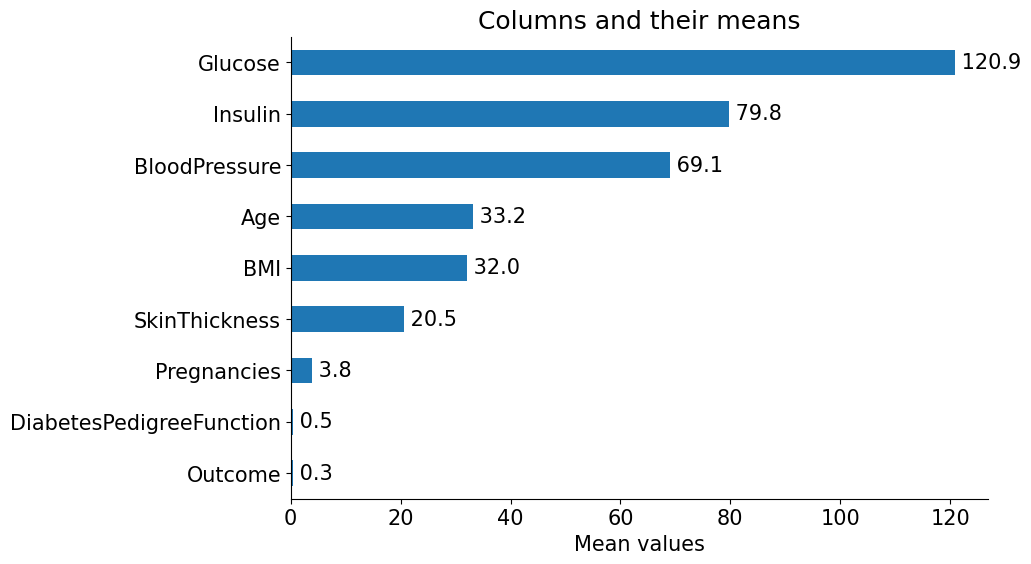

In [22]:
ax = (
    df.mean()
    .sort_values()
    .plot.barh(
        figsize=(9, 6),
        xlabel="Mean values",
        title="Columns and their means",
    )
)
for i in ax.containers:
    ax.bar_label(i, fmt=" %.1f")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

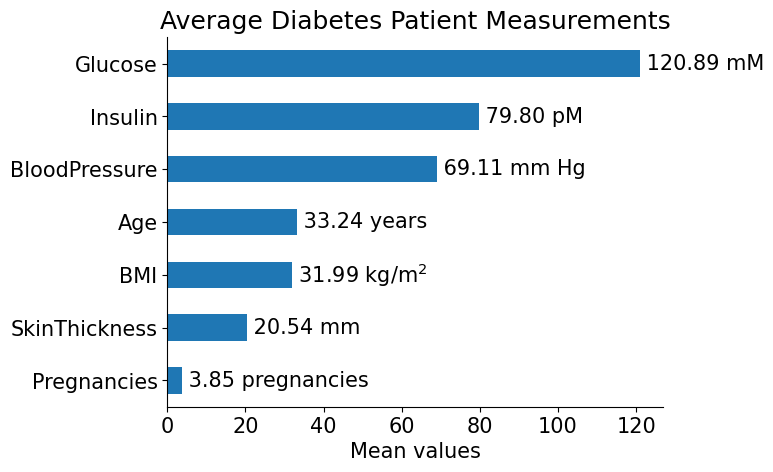

In [23]:
means = df.drop(["Outcome", "DiabetesPedigreeFunction"], axis=1).mean().sort_values()
units = [" pregnancies", " mm", r" kg/m$^2$", " years", " mm Hg", " pM", " mM"]
labs = [f" {v:.2f}" + u for v, u in zip(means, units)]
ax = means.plot.barh(
    title="Average Diabetes Patient Measurements", xlabel="Mean values"
)
for i in ax.containers:
    ax.bar_label(i, labels=labs)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [24]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

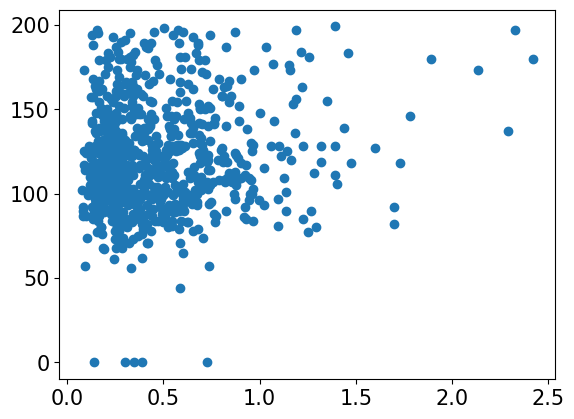

In [25]:
# =================================================-
#### Slide 13/32: Bivariate plots: scatterplot  ####

plt.scatter(df["DiabetesPedigreeFunction"], df["Glucose"]);

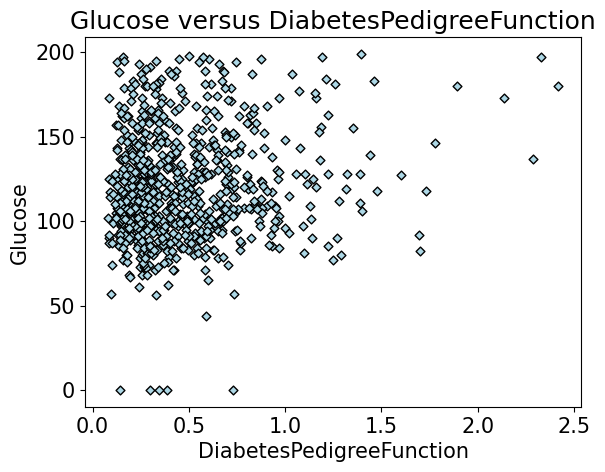

In [26]:
df.plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    marker="D",
    title="Glucose versus DiabetesPedigreeFunction",
    c="lightblue",
    edgecolor="k",
);

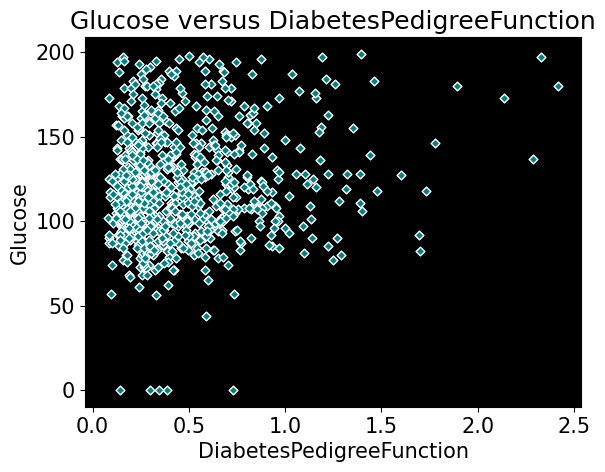

In [27]:
df.plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    marker="D",
    title="Glucose versus DiabetesPedigreeFunction",
    c="teal",
    edgecolor="white",
).set_facecolor("k")

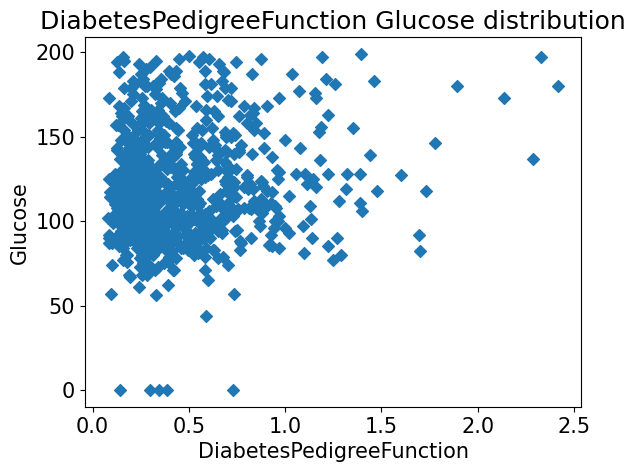

In [28]:
# =================================================-
#### Slide 14/32: Bivariate plots: scatterplot - cont'd  ####

plt.scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], marker="D"
)  # <- set marker type to diamond
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction Glucose distribution");

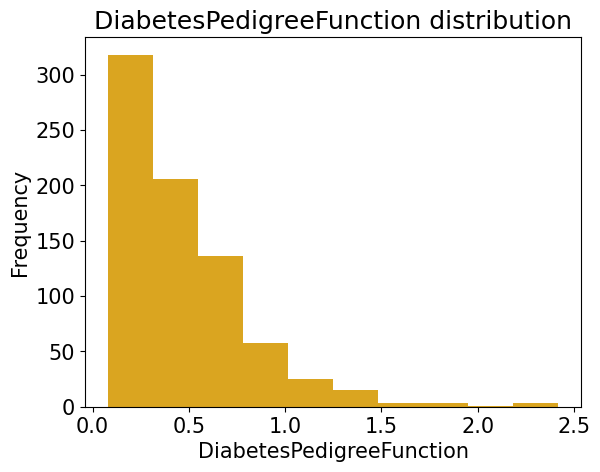

In [29]:
# =================================================-
#### Slide 17/32: Customize colors - cont'd  ####

plt.hist(df_subset["DiabetesPedigreeFunction"], facecolor="goldenrod")  # <- set color
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.title("DiabetesPedigreeFunction distribution")
plt.show()

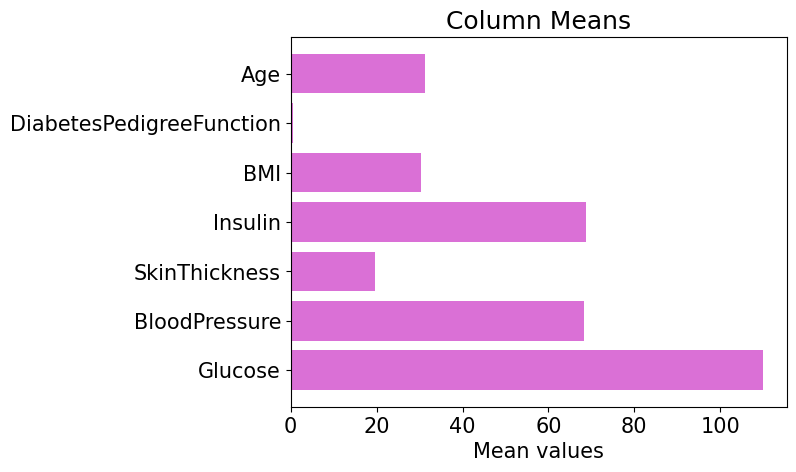

In [30]:
# =================================================-
#### Slide 18/32: Customize colors - cont'd  ####

plt.barh(bar_positions, bar_heights, color="orchid")
plt.yticks(bar_positions, bar_labels)
plt.xlabel("Mean values")
plt.title("Column Means");

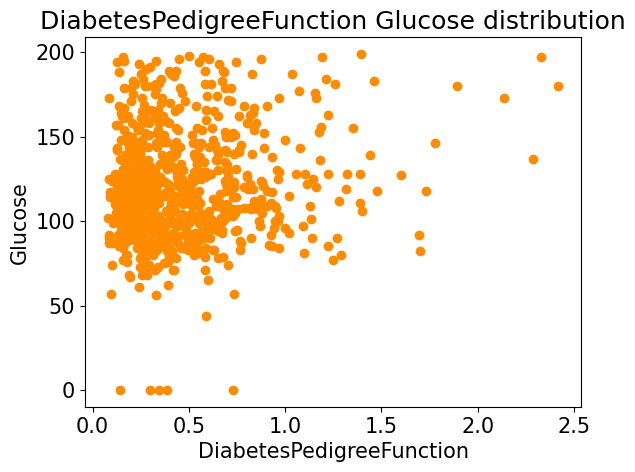

In [31]:
# =================================================-
#### Slide 19/32: Customize color: scatterplot  ####

plt.scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c="darkorange"
)  # <- set marker type to diamond
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction Glucose distribution")
plt.show()

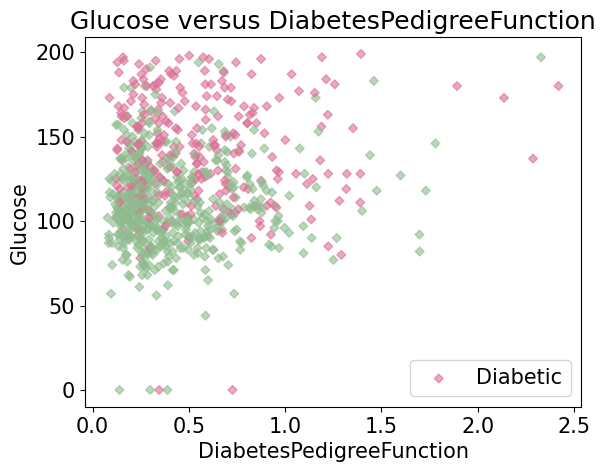

In [32]:
df["color"] = df["Outcome"].map({0: "darkseagreen", 1: "palevioletred"})
df.plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    marker="D",
    title="Glucose versus DiabetesPedigreeFunction",
    c="color",
    alpha=0.6,
    label="Diabetic",
);

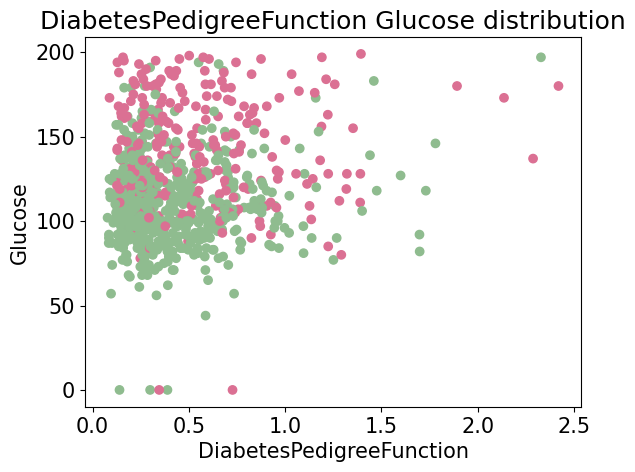

In [33]:
# =================================================-
#### Slide 21/32: Customize color: map colors - cont'd  ####

color = df_subset["Outcome"].map({0: "darkseagreen", 1: "palevioletred"})
plt.scatter(df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c=color)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction Glucose distribution")
plt.show()

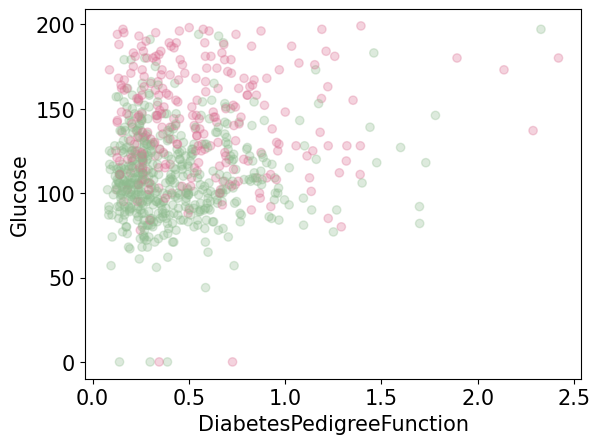

In [34]:
# =================================================-
#### Slide 23/32: Customize color: opacity (cont'd)  ####

plt.scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c=color, alpha=0.3
)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.show()

In [35]:
# =================================================-
#### Slide 24/32: Customize plot settings: available styles  ####

print(plt.style.available)
# plt.style.use("ggplot")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


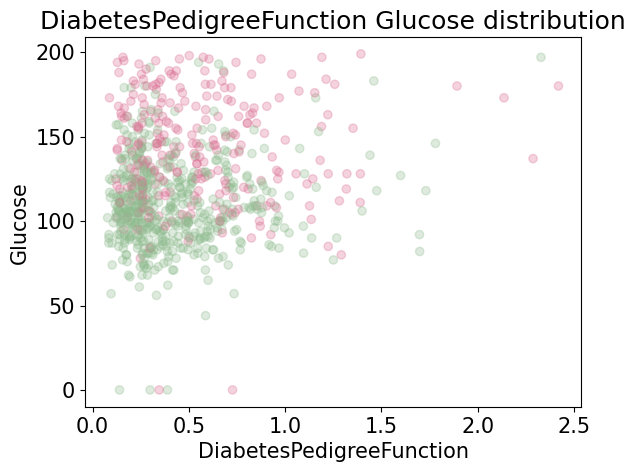

In [36]:
# =================================================-
#### Slide 25/32: Customize plot settings: test ggplot style  ####

plt.scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c=color, alpha=0.3
)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction Glucose distribution")
plt.show()

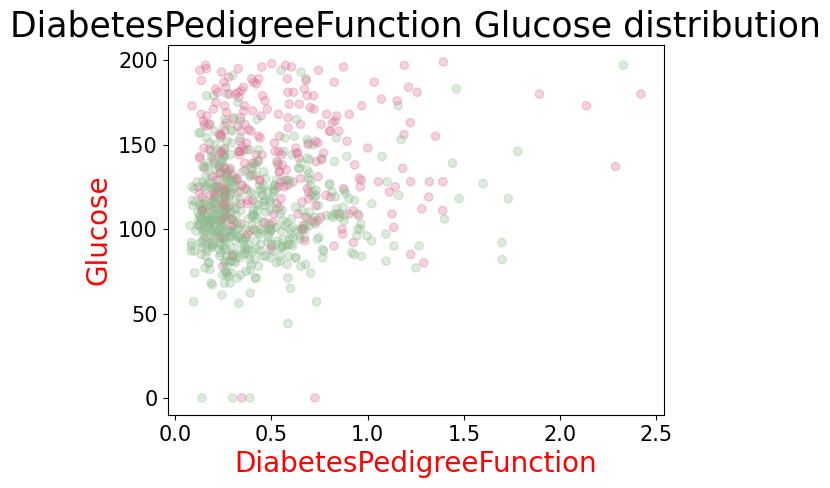

In [37]:
# =================================================  -
#### Slide 27/32: Customize plot settings: labels  ####

plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = "red"
plt.rcParams["axes.titlesize"] = 25
plt.scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c=color, alpha=0.3
)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction Glucose distribution")
plt.show()

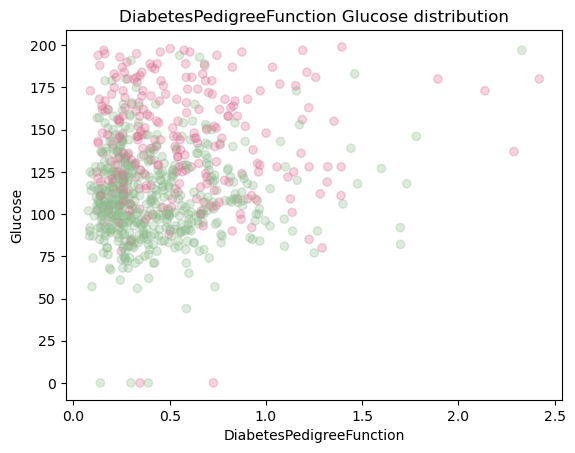

In [38]:
# ================================================= -
#### Slide 28/32: Customize plot settings: reset defaults  ####

plt.rcdefaults()
plt.scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c=color, alpha=0.3
)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction Glucose distribution")
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [39]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

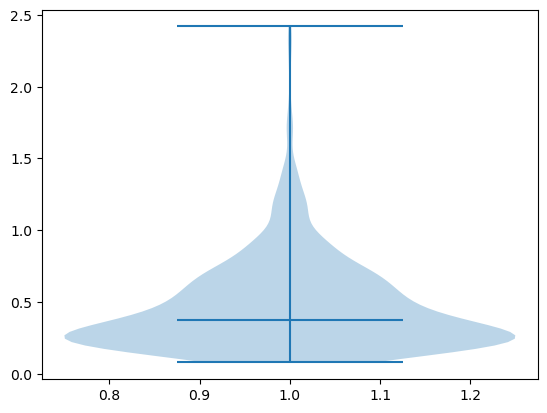

In [40]:
# =================================================-
#### Slide 4/29: Complex univariate plots: violin plots  ####

plt.violinplot(df_subset["DiabetesPedigreeFunction"], showmeans=False, showmedians=True)
plt.show()

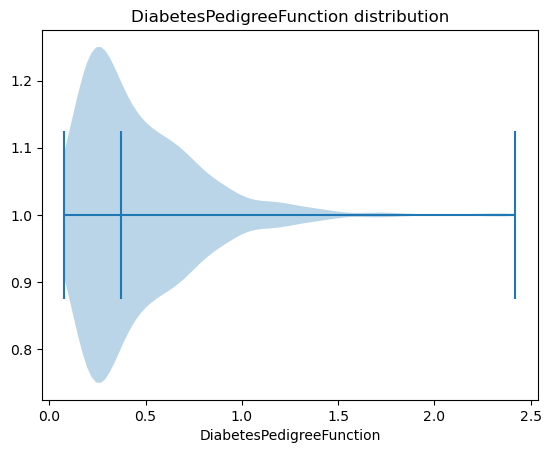

In [41]:
# =================================================-
#### Slide 6/29: Univariate plots: violin plot (cont'd)  ####

plt.violinplot(
    df_subset["DiabetesPedigreeFunction"], vert=False, showmeans=False, showmedians=True
)
plt.xlabel("DiabetesPedigreeFunction")
plt.title("DiabetesPedigreeFunction distribution")
plt.show()

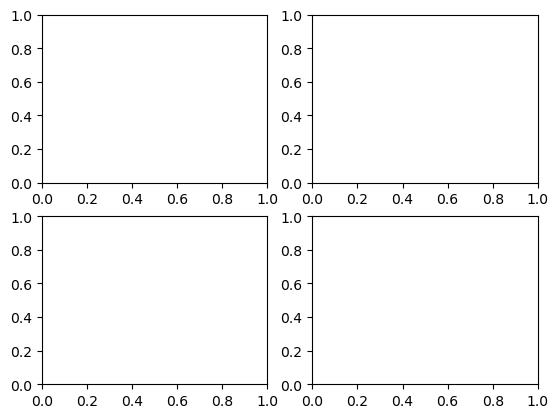

In [42]:
# =================================================-
#### Slide 8/29: Compound visualizations: grids  ####

# Create a 2 x 2 figure and axes grid.
fig, axes = plt.subplots(2, 2)
plt.show()

In [43]:
# =================================================-
#### Slide 9/29: Compound visualizations: axes  ####

print(axes)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

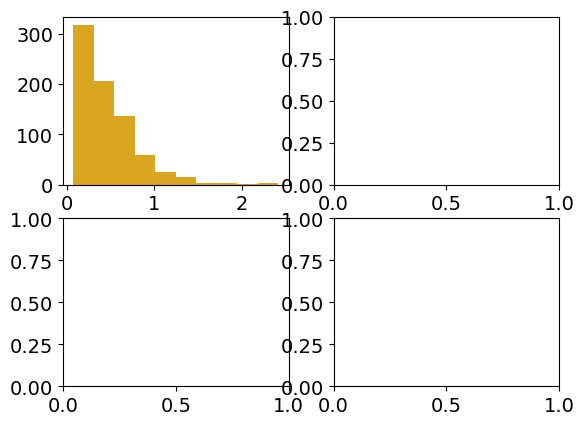

In [44]:
# =================================================-
#### Slide 10/29: Compound visualizations: axes (cont'd)  ####

plt.clf()
plt.figure(figsize=(8, 8))
plt.rcParams.update({"font.size": 14})
fig, axes = plt.subplots(2, 2)

axes[0, 0].hist(
    df_subset["DiabetesPedigreeFunction"], facecolor="goldenrod"
)  # <- set color

<Figure size 1200x800 with 0 Axes>

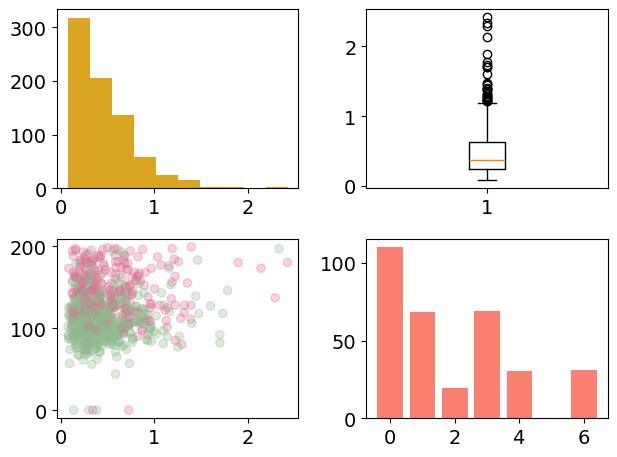

In [45]:
# =================================================-
#### Slide 11/29: Compound visualizations: axes (cont'd)  ####

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 2)
color_dict = {int("0"): "darkseagreen", int("1"): "palevioletred"}
color = df_subset["Outcome"].map(color_dict)
axes[0, 0].hist(
    df_subset["DiabetesPedigreeFunction"], facecolor="goldenrod"
)  # <- set color
axes[0, 1].boxplot(df_subset["DiabetesPedigreeFunction"])
axes[1, 0].scatter(
    df_subset["DiabetesPedigreeFunction"], df_subset["Glucose"], c=color, alpha=0.3
)
axes[1, 1].bar(bar_positions, bar_heights, color="salmon")
plt.tight_layout()
plt.show()

In [46]:
# =================================================-
#### Slide 12/29: Compound visualizations: labeling axes  ####

# Histogram.
axes[0, 0].set_ylabel("DiabetesPedigreeFunction distribution")
axes[0, 0].set_xlabel("DiabetesPedigreeFunction")

# Boxplot.
axes[0, 1].set_ylabel("DiabetesPedigreeFunction")

# Scatterplot.
axes[1, 0].set_xlabel("DiabetesPedigreeFunction")
axes[1, 0].set_ylabel("Glucose")

# Mean values of categories of variable means.
axes[1, 1].set_ylabel("Mean values")

Text(313.9444444444444, 0.5, 'Mean values')

In [47]:
# =================================================-
#### Slide 13/29: Compound visualizations: labeling ticks   ####

# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])
# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(bar_labels, rotation=18)

[Text(0, 0, 'Glucose'),
 Text(1, 0, 'BloodPressure'),
 Text(2, 0, 'SkinThickness'),
 Text(3, 0, 'Insulin'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'DiabetesPedigreeFunction'),
 Text(6, 0, 'Age')]

In [48]:
# =================================================-
#### Slide 14/29: Compound visualizations: figure adjustments  ####

plt.rcParams["axes.labelsize"] = 20
plt.rcParams["figure.titlesize"] = 25
fig.set_size_inches(18, 7.5)
fig.suptitle("Data Summary")

Text(0.5, 0.98, 'Data Summary')

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

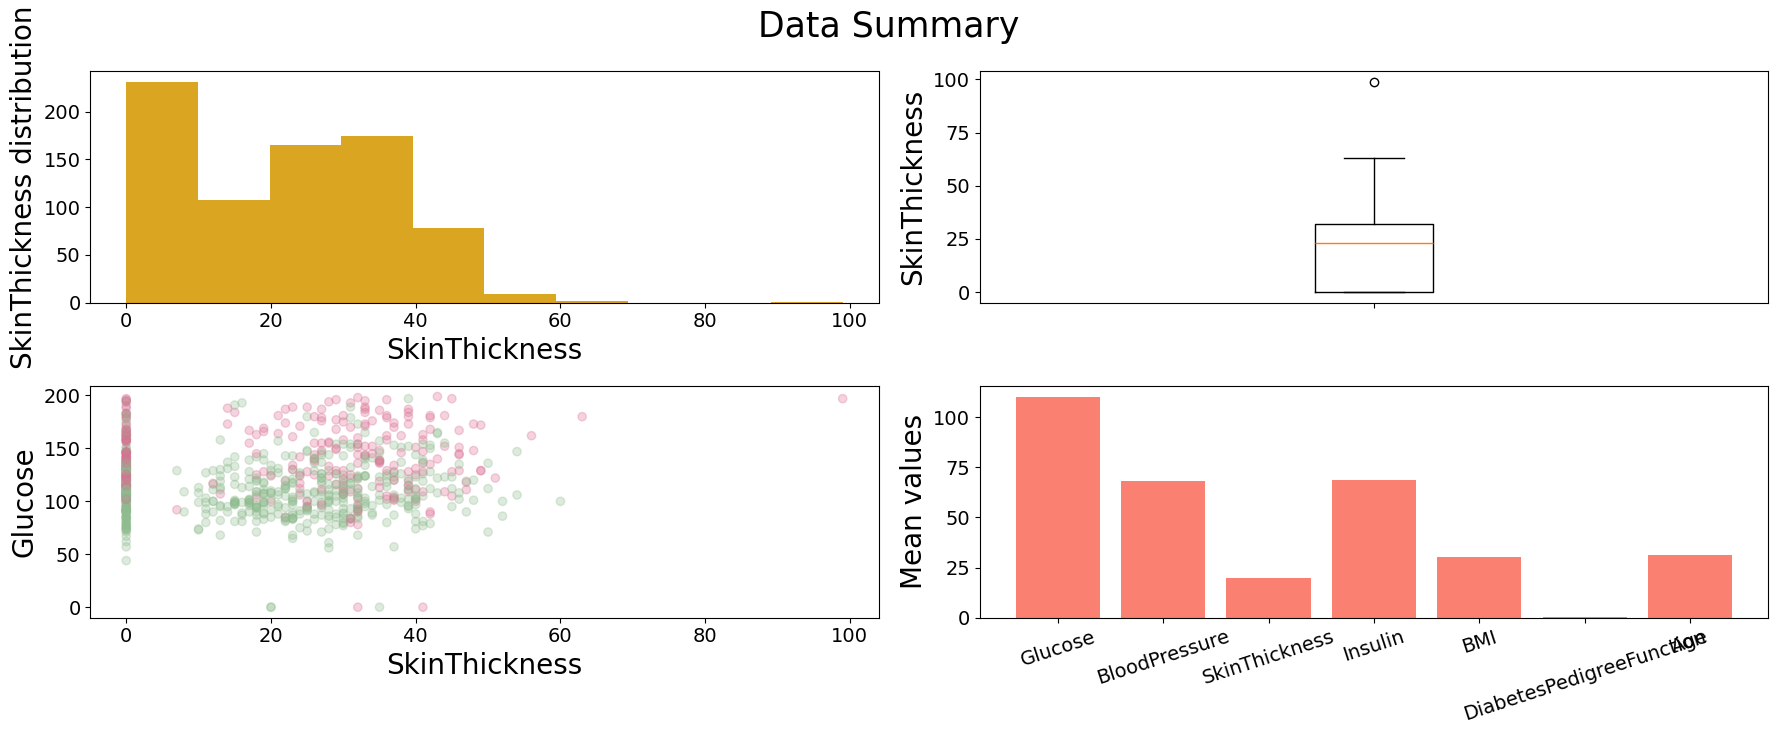

In [49]:
# =================================================-
#### Slide 15/29: Compound visualizations: putting it all together  ####

plt.clf()
plt.figure(figsize=(8, 8))
plt.rcParams.update({"font.size": 14})
fig, axes = plt.subplots(2, 2)

color_dict = {int("0"): "darkseagreen", int("1"): "palevioletred"}
color = df_subset["Outcome"].map(color_dict)
axes[0, 0].hist(df_subset["SkinThickness"], facecolor="goldenrod")  # <- set color
axes[0, 1].boxplot(df_subset["SkinThickness"])
axes[1, 0].scatter(df_subset["SkinThickness"], df_subset["Glucose"], c=color, alpha=0.3)
axes[1, 1].bar(bar_positions, bar_heights, color="salmon")

# Histogram.
axes[0, 0].set_ylabel("SkinThickness distribution")
axes[0, 0].set_xlabel("SkinThickness")

# Boxplot.
axes[0, 1].set_ylabel("SkinThickness")

# Scatterplot.
axes[1, 0].set_xlabel("SkinThickness")
axes[1, 0].set_ylabel("Glucose")

# Mean values of categories of variable means.
axes[1, 1].set_ylabel("Mean values")

# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])

# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(bar_labels, rotation=18)

plt.rcParams["axes.labelsize"] = 20
plt.rcParams["figure.titlesize"] = 25
fig.set_size_inches(18, 7.5)
fig.suptitle("Data Summary")
plt.tight_layout()
plt.show()

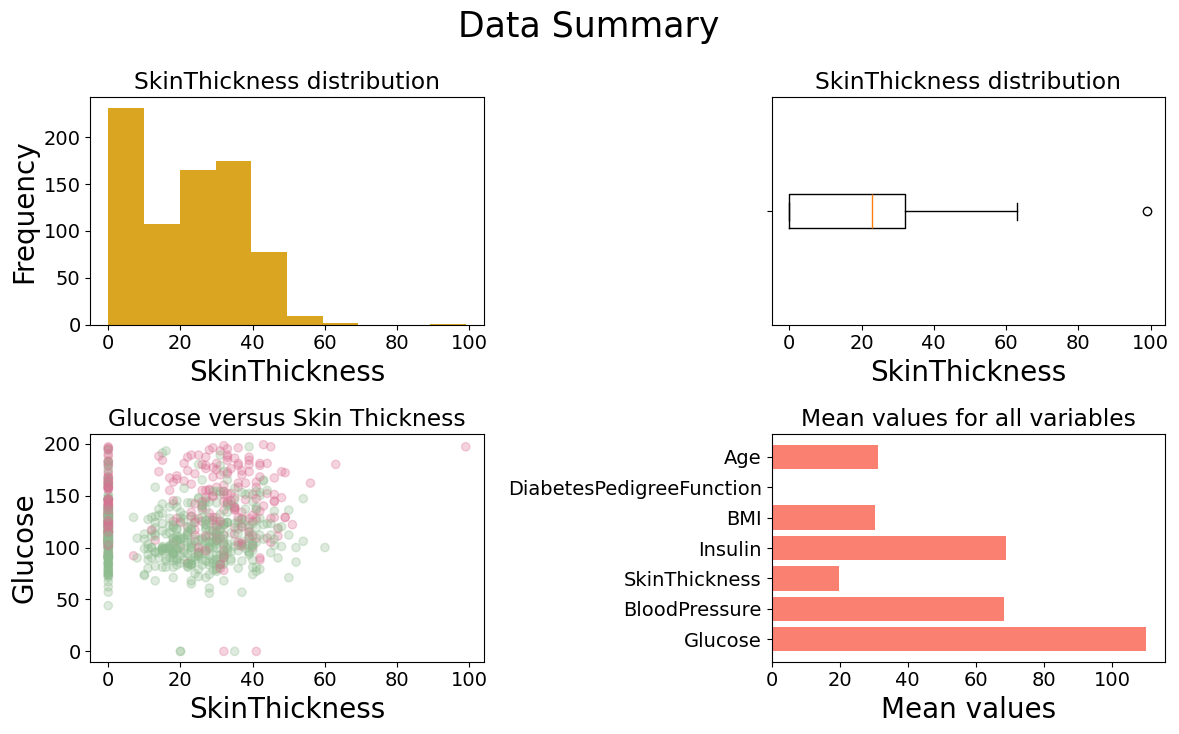

In [50]:
fig, axes = plt.subplots(2, 2)

color = df["Outcome"].map(
    {
        0: "darkseagreen",
        1: "palevioletred",
    }
)
axes[0, 0].hist(df_subset["SkinThickness"], color="goldenrod")
axes[0, 1].boxplot(df["SkinThickness"], vert=False)
axes[1, 0].scatter(df["SkinThickness"], df["Glucose"], c=color, alpha=0.3)
axes[1, 1].barh(bar_positions, bar_heights, color="salmon")

# Histogram.
axes[0, 0].set_title("SkinThickness distribution")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_xlabel("SkinThickness")

# Boxplot.
axes[0, 1].set_title("SkinThickness distribution")
axes[0, 1].set_xlabel("SkinThickness")

# Scatterplot.
axes[1, 0].set_xlabel("SkinThickness")
axes[1, 0].set_ylabel("Glucose")
axes[1, 0].set_title("Glucose versus Skin Thickness")

# Mean values of categories of variable means.
axes[1, 1].set_xlabel("Mean values")
axes[1, 1].set_title("Mean values for all variables")

# No labels for ticks for boxplot.
axes[0, 1].yaxis.set_ticklabels([""])

# Tick positions set to bar positions in bar chart.
axes[1, 1].yaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].yaxis.set_ticklabels(bar_labels)

plt.rcParams["axes.labelsize"] = 20
plt.rcParams["figure.titlesize"] = 25
fig.set_size_inches(12, 7.5)
fig.suptitle("Data Summary")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

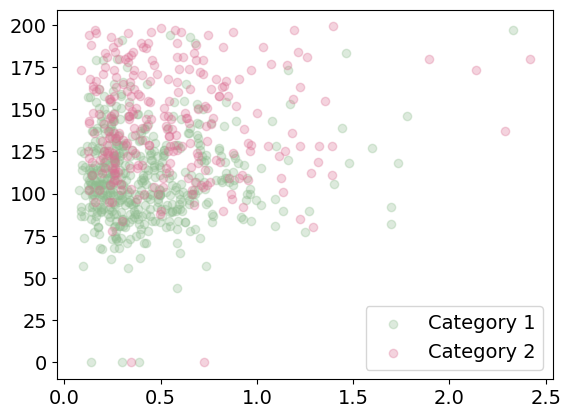

In [51]:
# =================================================-
#### Slide 18/29: Compound visualizations: layered plots (cont'd)  ####

plt.clf()  # <- clear plotting area
fig, axes = plt.subplots()  # <- create a new figure and axes objects for plotting

grouping_col_levels = list(df_grouped_mean_long[grouping_col].unique())
grouping_category_1 = grouping_col_levels[0]
grouping_category_2 = grouping_col_levels[1]

for key, value in color_dict.items():
    query = str("Outcome") + "==" + str(key)
    sc_col_1 = df_subset.query(query)["DiabetesPedigreeFunction"]
    sc_col_2 = df_subset.query(query)["Glucose"]

    if key == int(grouping_category_1):
        Flag = "Category 1"
    else:
        Flag = "Category 2"

    axes.scatter(sc_col_1, sc_col_2, c=value, label=Flag, alpha=0.3)
axes.legend()  # <- add a legend that would automatically get labels and colors from layers!

plt.show()

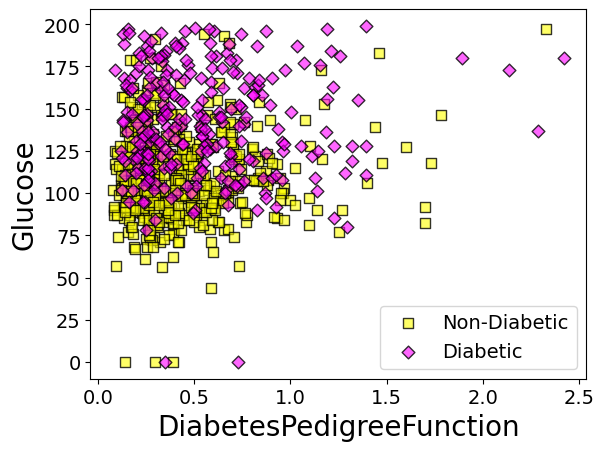

In [52]:
(_, non), (_, dia) = pd.read_csv("data/diabetes.csv").groupby("Outcome")
ax = non.plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    edgecolor="#000c",
    s=42,
    c="#ff09",
    marker="s",
    label="Non-Diabetic",
)
dia.plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    edgecolor="#000c",
    s=42,
    c="#f0f9",
    marker="D",
    label="Diabetic",
    ax=ax,
);

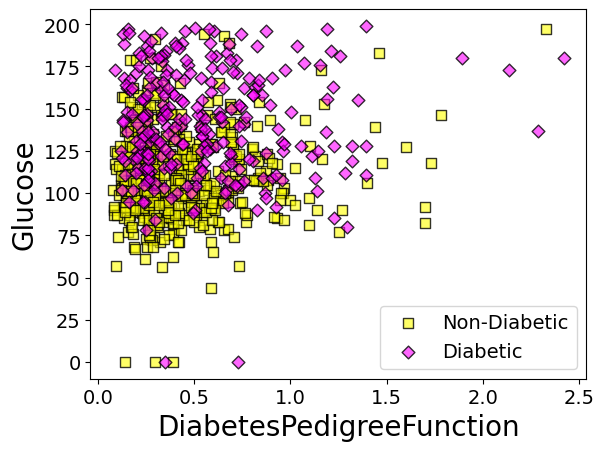

In [53]:
(_, non), (_, dia) = pd.read_csv("data/diabetes.csv").groupby("Outcome")
plot_kwargs = dict(x="DiabetesPedigreeFunction", y="Glucose", edgecolor="#000c", s=42)
ax = non.plot.scatter(**plot_kwargs, c="#ff09", marker="s", label="Non-Diabetic")
dia.plot.scatter(**plot_kwargs, c="#f0f9", marker="D", label="Diabetic", ax=ax);

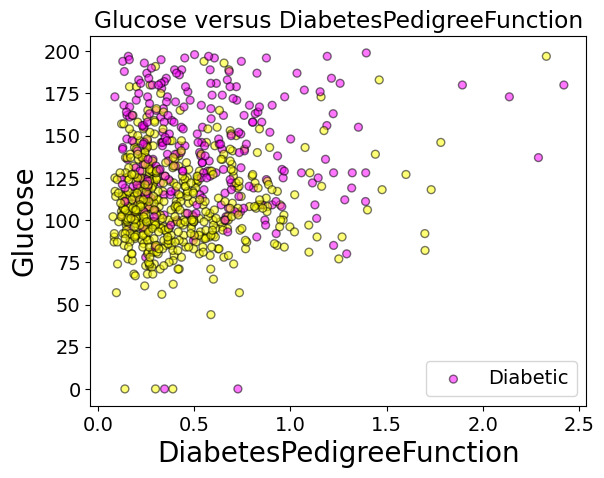

In [54]:
color = df["Outcome"].map({0: "#ff08", 1: "#f0f8"})
df.plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    title="Glucose versus DiabetesPedigreeFunction",
    c=color,
    s=32,
    edgecolors="#0008",
    label="Diabetic",
);

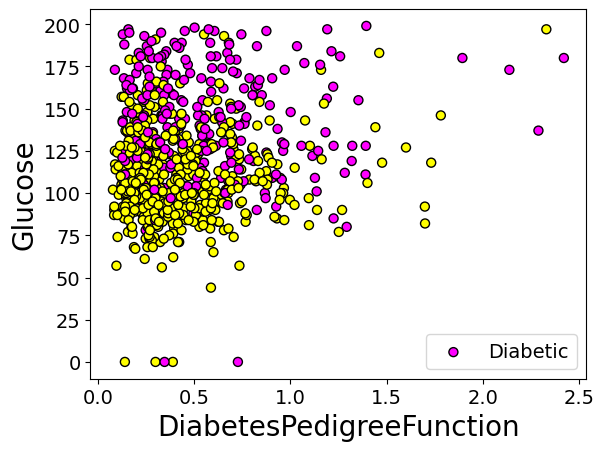

In [55]:
import matplotlib.colors

ax = pd.read_csv("data/diabetes.csv").plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    c="Outcome",
    cmap=matplotlib.colors.ListedColormap(["#ff0f", "#f0ff"]),
    edgecolor="#000f",
    s=42,
    colorbar=False,
    label="Diabetic",
);

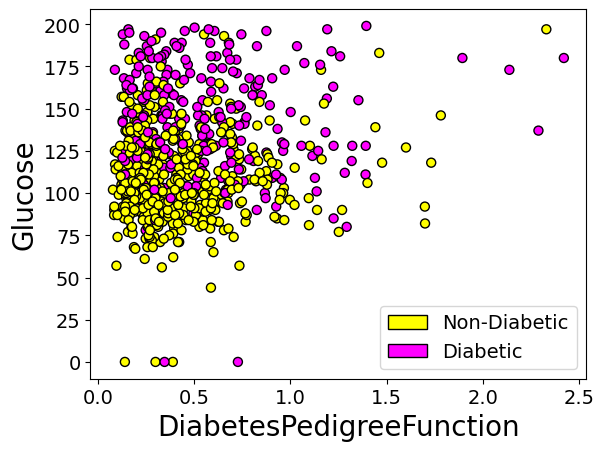

In [56]:
import matplotlib.patches as mpatches

legend_handles = [
    mpatches.Patch(facecolor="#ff0f", edgecolor="#000f", label="Non-Diabetic"),
    mpatches.Patch(facecolor="#f0ff", edgecolor="#000f", label="Diabetic"),
]

ax = pd.read_csv("data/diabetes.csv").plot.scatter(
    x="DiabetesPedigreeFunction",
    y="Glucose",
    c="Outcome",
    cmap=matplotlib.colors.ListedColormap(["#ff0f", "#f0ff"]),
    edgecolor="#000f",
    s=42,
    colorbar=False,
    label="Diabetic",
)
ax.legend(handles=legend_handles, loc="lower right");

In [57]:
# =================================================-
#### Slide 20/29: Compound visualizations: layered plots (cont'd)  ####

# We already have `'Outcome'` = `'0'` mean data.
print(df_true_means.head())
# Let's get the `'Outcome'` = `'1'` mean data.
query = str("Outcome") + "==" + str("1")
df_false_means = df_grouped_mean_long.query(query)[["metric", "mean"]]
print(df_false_means)

          metric      mean
0        Glucose  109.9800
2  BloodPressure   68.1840
4  SkinThickness   19.6640
6        Insulin   68.7920
8            BMI   30.3042
                      metric        mean
1                    Glucose  141.257463
3              BloodPressure   70.824627
5              SkinThickness   22.164179
7                    Insulin  100.335821
9                        BMI   35.142537
11  DiabetesPedigreeFunction    0.550500
13                       Age   37.067164


In [58]:
# =================================================-
#### Slide 21/29: Compound visualizations: layered plots (cont'd)  ####

# Mean values for `'Outcome'` = `'0'` data.
category_1_bar_heights = df_true_means["mean"]
# Mean values for `'Outcome'` = `'1'` data.
category_2_bar_heights = df_false_means["mean"]
# Labels of bars, their width, and positions are shared for both categories.
bar_labels = df_false_means["metric"]
num_bars = len(bar_labels)
bar_positions = np.arange(num_bars)
width = 0.35

<Figure size 640x480 with 0 Axes>

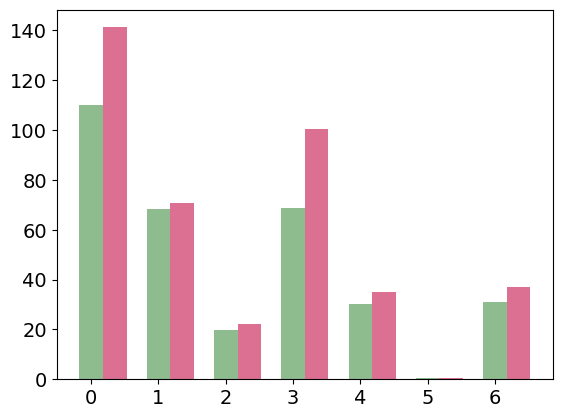

In [59]:
# =================================================-
#### Slide 22/29: Compound visualizations: layered plots (cont'd)  ####

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()
category_1_bar_chart = axes.bar(
    bar_positions,  # <- set bar positions
    category_1_bar_heights,  # <- set bar heights
    width,  # <- set width of the bars
    color=color_dict[0],
)  # <- set color corresponding to '0' in dictionary
category_2_bar_chart = axes.bar(
    bar_positions + width,  # <- set bar positions
    category_2_bar_heights,  # <- set bar heights
    width,  # <- set width of the bars
    color=color_dict[1],
)  # <- set color corresponding to '1' in dictionary

In [60]:
# =================================================-
#### Slide 23/29: Compound visualizations: layered plots (cont'd)  ####

# Add text for labels, title and axes ticks.
axes.set_ylabel("Mean values")
axes.set_title("Data metrics summary")
axes.set_xticks(bar_positions + width / 2)
axes.set_xticklabels(bar_labels)

[Text(0.175, 0, 'Glucose'),
 Text(1.175, 0, 'BloodPressure'),
 Text(2.175, 0, 'SkinThickness'),
 Text(3.175, 0, 'Insulin'),
 Text(4.175, 0, 'BMI'),
 Text(5.175, 0, 'DiabetesPedigreeFunction'),
 Text(6.175, 0, 'Age')]

<Figure size 640x480 with 0 Axes>

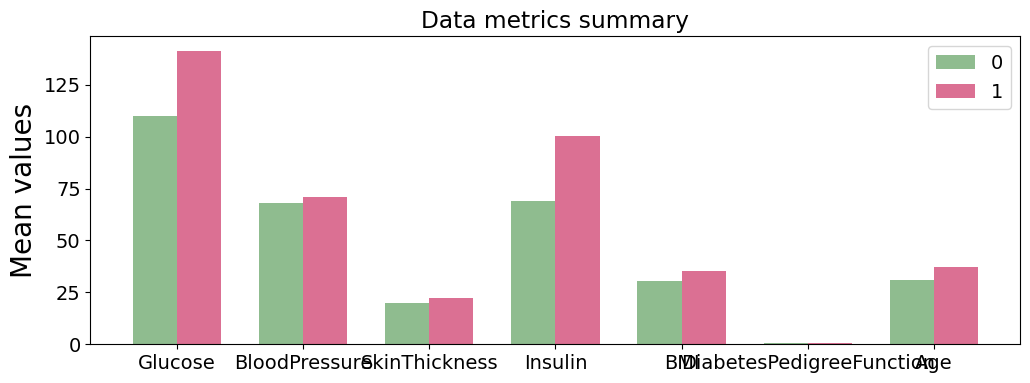

In [61]:
# =================================================-
#### Slide 24/29: Compound visualizations: layered plots (cont'd)  ####

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()

category_1_bar_chart = axes.bar(
    bar_positions,  # <- set bar positions
    category_1_bar_heights,  # <- set bar heights
    width,  # <- set width of the bars
    color=color_dict[0],
)  # <- set color corresponding to '0' in dictionary
category_2_bar_chart = axes.bar(
    bar_positions + width,  # <- set bar positions
    category_2_bar_heights,  # <- set bar heights
    width,  # <- set width of the bars
    color=color_dict[1],
)  # <- set color corresponding to '1' in dictionary

# Add text for labels, title and axes ticks.
axes.set_ylabel("Mean values")
axes.set_title("Data metrics summary")
axes.set_xticks(bar_positions + width / 2)
axes.set_xticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
axes.legend(
    (category_1_bar_chart, category_2_bar_chart),
    (f"{grouping_category_1}", f"{grouping_category_2}"),
)
fig.set_size_inches(12, 4)
plt.show()

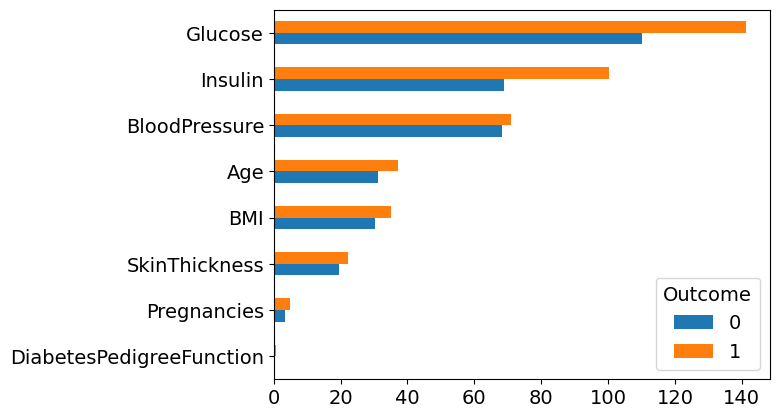

In [62]:
pd.read_csv("data/diabetes.csv").drop("id", axis=1).groupby(
    "Outcome"
).mean().T.sort_values(0).plot.barh();

In [63]:
# =================================================-
#### Slide 28/29: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################